導入庫


In [225]:
import pandas as pd
import numpy as np
# download the dataset
import urllib.request
import matplotlib.pyplot as plt

下載資料 輸出資料格式

In [226]:
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

X_train.head()

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


預處理資料

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_split, X_valid, y_train_split, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0) 

#標準化特徵
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_split)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

RidgeClassifier model for all attributes

In [228]:
# 導入庫文件
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score

# 測試不同超參數
degrees = [1, 2, 3, 4, 5]
alphas = [1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]
results = []

for degree in degrees:
    for alpha in alphas:
        # 使用 Pipeline 結合多項式特徵和 RidgeClassifier
        model = make_pipeline(PolynomialFeatures(degree), RidgeClassifier(alpha=alpha))
        model.fit(X_train_std, y_train_split)
        
        # 預測
        y_train_pred = model.predict(X_train_std)
        y_valid_pred = model.predict(X_valid_std)
        
        # 計算性能指標
        train_acc = accuracy_score(y_train_split, y_train_pred)
        valid_acc = accuracy_score(y_valid, y_valid_pred)
        train_f1 = f1_score(y_train_split, y_train_pred)
        valid_f1 = f1_score(y_valid, y_valid_pred)
        
        results.append({
            'Degree': degree,
            'Alpha': alpha,
            'Train Accuracy': train_acc,
            'Valid Accuracy': valid_acc,
            'Train F1': train_f1,
            'Valid F1': valid_f1
        })

# 展示結果
results_df = pd.DataFrame(results)
print(results_df)
results_df.to_csv('./train_result.csv', index=False)


c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

    Degree     Alpha  Train Accuracy  Valid Accuracy  Train F1  Valid F1
0        1     0.001        0.607536        0.609002  0.517760  0.524262
1        1     0.010        0.607536        0.609002  0.517760  0.524262
2        1     0.100        0.607536        0.609002  0.517760  0.524262
3        1     1.000        0.607536        0.609002  0.517760  0.524262
4        1    10.000        0.607551        0.609002  0.517769  0.524262
5        1   100.000        0.607434        0.608827  0.517384  0.523678
6        1  1000.000        0.607930        0.608944  0.516085  0.521919
7        2     0.001        0.617784        0.610402  0.477294  0.476578
8        2     0.010        0.617784        0.610402  0.477294  0.476578
9        2     0.100        0.617784        0.610402  0.477294  0.476578
10       2     1.000        0.617813        0.610402  0.477354  0.476578
11       2    10.000        0.617784        0.610343  0.477335  0.476459
12       2   100.000        0.617726        0.61034

採用 degree = 3,alpha = 100 的 model

c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

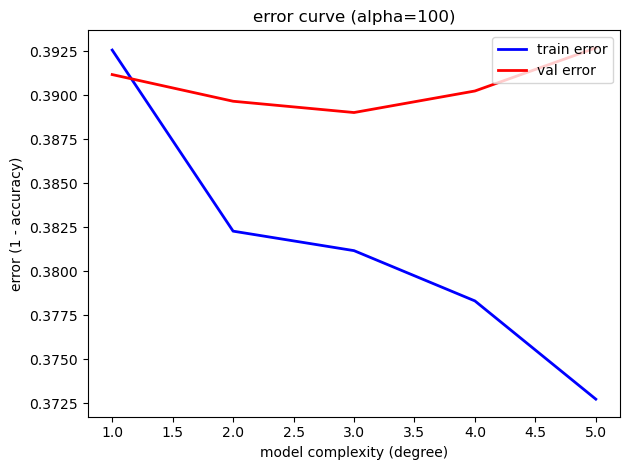

In [229]:
# 繪製誤差曲線
selected_alpha = 100
error_train = []
error_valid = []
degrees = range(1, 6)  # 測試 degree=1 到 5
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), RidgeClassifier(alpha=selected_alpha))
    model.fit(X_train_std, y_train_split)
    y_train_pred = model.predict(X_train_std)
    y_valid_pred = model.predict(X_valid_std)
    error_train.append(1 - accuracy_score(y_train_split, y_train_pred))  # 訓練誤差
    error_valid.append(1 - accuracy_score(y_valid, y_valid_pred))  # 驗證誤差

# 繪製曲線
plt.plot(degrees, error_train, label='train error', color='blue', linewidth=2)
plt.plot(degrees, error_valid, label='val error', color='red', linewidth=2)
plt.xlabel('model complexity (degree)')
plt.ylabel('error (1 - accuracy)')
plt.title(f'error curve (alpha={selected_alpha})')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('./fig-error-curve.png', dpi=300)
plt.show()

利用 LASSO model 找到 3 個最佳的 feature

selected features: ['SHOT_CLOCK', 'SHOT_DIST', 'CLOSE_DEF_DIST']


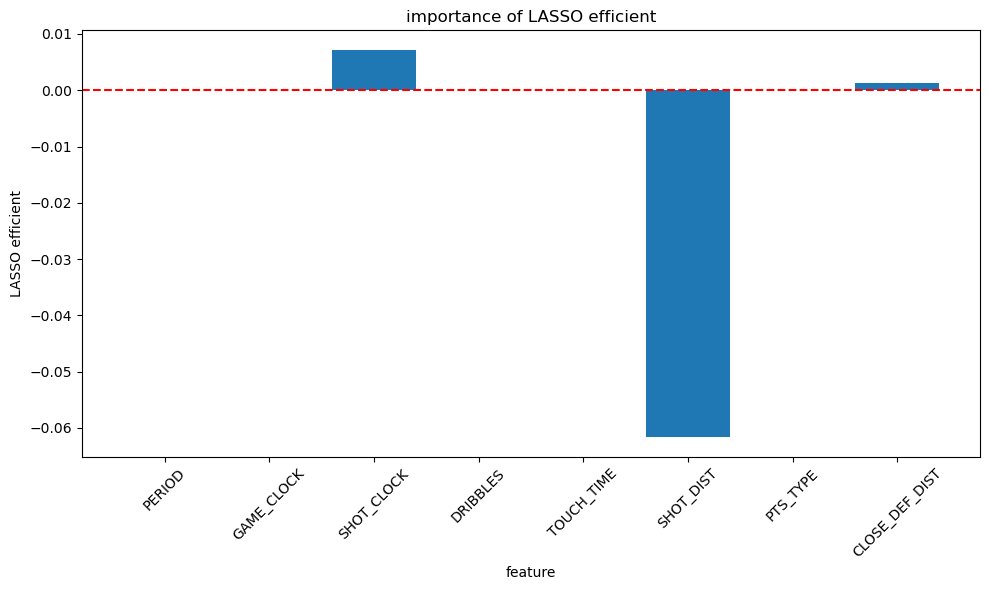

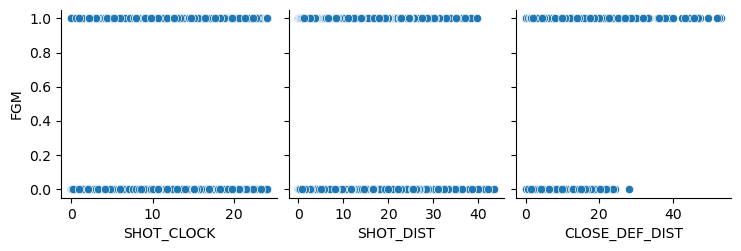

In [230]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# 使用 LASSO 選擇最佳 3 個特徵
lasso = Lasso(alpha=0.03, max_iter=1000)  # 調整 alpha 直到確保選出約 3 個特徵
lasso.fit(X_train_std, y_train_split)
coef = lasso.coef_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coef})
selected_features = feature_importance[abs(feature_importance['Coefficient']) > 0]['Feature'].head(3).tolist()  # 選前 3 個非零係數的特徵
print('selected features:', selected_features)

# 可視化 LASSO 係數
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'])
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('feature')
plt.ylabel('LASSO efficient')
plt.title('importance of LASSO efficient')
plt.tight_layout()
plt.savefig('./fig-lasso-coef.png', dpi=300)
plt.show()

# 檢查特徵相關性
sns.pairplot(pd.concat([X_train[selected_features], y_train['FGM']], axis=1), x_vars=selected_features, y_vars=['FGM'])
plt.savefig('./fig-feature-correlation.png', dpi=300)
plt.show()

調整參數 alpha = 0.3 結果顯示恰好有三個特徵係數不為 0, 所以挑選這三個特徵重新用 RidgeClassifier 訓練

In [231]:
# 導入庫文件
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score

selected_features = ['SHOT_CLOCK', 'SHOT_DIST', 'CLOSE_DEF_DIST']  # 手動設置三個特徵

# 選定特徵處理數據
X_train_selected = X_train_split[selected_features]
X_valid_selected = X_valid[selected_features]
X_test_selected = X_test[selected_features]
sc_selected = StandardScaler()
X_train_selected_std = sc_selected.fit_transform(X_train_selected)
X_valid_selected_std = sc_selected.transform(X_valid_selected)
X_test_selected_std = sc_selected.transform(X_test_selected)

# 測試不同超參數
degrees = [1, 2, 3, 4, 5]
alphas = [1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]
results = []

for degree in degrees:
    for alpha in alphas:

        model = make_pipeline(PolynomialFeatures(degree), RidgeClassifier(alpha=alpha))
        model.fit(X_train_selected_std, y_train_split)
        
        # 預測
        y_train_selected_pred = model.predict(X_train_selected_std)
        y_valid_selected_pred = model.predict(X_valid_selected_std)
        
        # 計算性能指標
        train_acc = accuracy_score(y_train_split, y_train_selected_pred)
        valid_acc = accuracy_score(y_valid, y_valid_selected_pred)
        train_f1 = f1_score(y_train_split, y_train_selected_pred)
        valid_f1 = f1_score(y_valid, y_valid_selected_pred)
        
        results.append({
            'Degree': degree,
            'Alpha': alpha,
            'Train Accuracy': train_acc,
            'Valid Accuracy': valid_acc,
            'Train F1': train_f1,
            'Valid F1': valid_f1,
        })

# 展示結果
results_df = pd.DataFrame(results)
print(results_df)
results_df.to_csv('./3_feature_train_result.csv', index=False)


c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

    Degree     Alpha  Train Accuracy  Valid Accuracy  Train F1  Valid F1
0        1     0.001        0.606647        0.606145  0.520199  0.526397
1        1     0.010        0.606647        0.606145  0.520199  0.526397
2        1     0.100        0.606647        0.606145  0.520199  0.526397
3        1     1.000        0.606647        0.606145  0.520199  0.526397
4        1    10.000        0.606647        0.606145  0.520199  0.526397
5        1   100.000        0.606749        0.605854  0.520093  0.525880
6        1  1000.000        0.607055        0.606145  0.518591  0.523860
7        2     0.001        0.613907        0.608944  0.483623  0.486250
8        2     0.010        0.613907        0.608944  0.483623  0.486250
9        2     0.100        0.613907        0.608944  0.483623  0.486250
10       2     1.000        0.613907        0.608944  0.483623  0.486250
11       2    10.000        0.613936        0.608827  0.483642  0.486019
12       2   100.000        0.614009        0.60865

選擇 complexity = 3  alpha = 1000 作為參數 繪製圖像說明沒有overfit

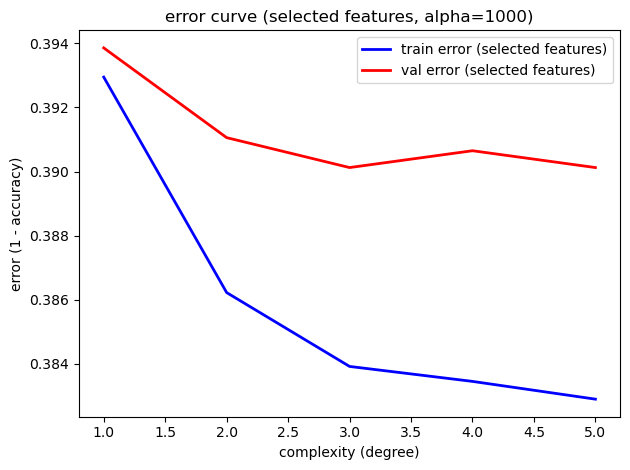

In [232]:
# 繪製誤差曲線
degrees = range(1, 6)  # 測試 degree=1 到 5

plt.plot(degrees, error_train_selected, label='train error (selected features)', color='blue', linewidth=2)
plt.plot(degrees, error_valid_selected, label='val error (selected features)', color='red', linewidth=2)
plt.xlabel('complexity (degree)')
plt.ylabel('error (1 - accuracy)')
plt.title('error curve (selected features, alpha=1000)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('./fig-error-curve-selected.png', dpi=300)
plt.show()

用該 model 預測測試集的資料,並導出文件

In [233]:
# 對測試集進行預測
y_test_pred = model.predict(X_test_selected_std)

# 創建預測結果 DataFrame
predictions_df = pd.DataFrame({
    'FGM': y_test_pred
}, index=X_test.index)  # 保持原始索引

# 導出為 CSV 文件
output_path = './Lab05_0007-114550902_y_pred.csv'
predictions_df.to_csv(output_path, index=True)

報告

在這次作業中，我首先按照流程導入並預處理了資料(切分成train set 與 validation set)，然後用 RidgeClassifier model 與資料所有的 features 進行訓練，通過嘗試不同的 complexity 和 alpha 組合得到了一系列模型，選擇了其中性能最優的一組作為參數，並繪製出 error curve 圖像說明沒有overfit.

隨後，為了選出 3 個最重要的 feature, 我選擇使用LASSO model 來重新訓練參數，並反復調節 alpha 使其恰好得到 3 個不為零的 feature, 然後再用 RidgeClassifier model 與資料的這 3 個 features 重新訓練得到最好的參數，最後將測試集輸入該模型得到預測的 prediction file